check for indicators here:

https://databank.worldbank.org/reports.aspx?source=world-development-indicators


Some of the methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir('/content/drive/MyDrive/Data_analysis')

In [3]:
import pandas as pd

data = pd.read_csv('WDIData.csv')

In [4]:
display(data.head())
display(data.shape)
display(data.columns)

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2013       2014       2015  \
0   NaN   NaN   NaN   NaN   NaN  ...  16.789043  17.196986  17.597176   
1   NaN   NaN   NaN   NaN   NaN  ...   6.397917   6.580066   6.786218   
2   NaN   NaN   NaN   NaN   NaN  ...  37.660864  37.857526  38.204173   
3   NaN   NaN   NaN   NaN   NaN  ...  31.610692  31.824950  33.744405   
4   NaN   NaN   NaN   NaN   NaN  ...  18.535523  17.485006  16.329765   

        2016       2017       2018       2019       2020  2021  Unnamed: 66  
0  18.034249  18.345878  18.695306  19.149942  19.501837   NaN          NaN  
1   6.941323   7.096843   7.254828   7.460783   7.599289   NaN          NaN  
2  38.303515  38.421813  38.482409  38.692053  38.793983   NaN          NaN  
3  38.733352  40.092163  42.880977  44.073912  45.609604   NaN          NaN  
4  24.372504  25.153292  27.227391  29.383000  30.163364   NaN          NaN  

[5 rows x 67 columns]

(383572, 67)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [5]:
data.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              344590
                   ...  
2018              172567
2019              182156
2020              220700
2021              288710
Unnamed: 66       383572
Length: 67, dtype: int64

In [6]:
display(data['Indicator Name'].nunique())
display(data['Country Name'].nunique())
display(data['Indicator Name'].describe())

1442

266

count                                                383572
unique                                                 1442
top       Access to clean fuels and technologies for coo...
freq                                                    266
Name: Indicator Name, dtype: object

In [7]:
data.groupby('Indicator Name').apply(lambda x: x.duplicated().sum()).any()

False

In [8]:
#This cell tries different methods to remove empty data cells. Since the dataset is missing many values, different methods were used.

#Removing rows with more than half of the data missing.
df = data.dropna(thresh = len(data.columns)/2)
display(df.shape) 

#Visualising top missing years
Top_year_missing = df.groupby('Indicator Name').mean().isna().mean().sort_values(ascending=False)
display(Top_year_missing.head(10))


#Removing rows where the average missing data points are higher that other rows in the last 4 decades
df_recent = df[['1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

average_missing_values = df_recent.isna().sum(axis=1).mean()
high_missing_rows = df_recent[df_recent.isna().sum(axis=1) > average_missing_values].index
df_recent = df_recent.drop(index=high_missing_rows)
display(df.shape)
 
 #Removing top 100 missing rows. 
Top_missing = df_recent.isna().sum(axis=1).nlargest(100).index.tolist()
df_recent = df_recent.drop(index = Top_missing, axis=0)

display(df.shape)
display(df['Indicator Name'].nunique())

(124595, 67)

Unnamed: 66    1.000000
1960           0.558758
1961           0.511086
1962           0.496674
1963           0.491131
1964           0.491131
1966           0.484479
1967           0.481153
1968           0.481153
1965           0.480044
dtype: float64

(124595, 67)

(124595, 67)

902

In [9]:
#Re-using the same method for removing top 100 rows that are missing values in the last two decades.
last_two_decades = df[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

missing_values = last_two_decades.isna().sum(axis=1)
max_missing = missing_values.nlargest(100).index.tolist()

last_two_decades = last_two_decades.drop(index=max_missing, axis=0)

df = df.drop(index=max_missing, axis=0)
display(df.shape)

(124495, 67)

### Question 1: A) Which indicators are highly corellated with health outcomes? 
###B) How did these relationships change over time?

In [10]:
df_med = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')
df_med = df_med.dropna()
display(df_med.head())

Country Name Country Code  \
14  Africa Eastern and Southern          AFE   
15  Africa Eastern and Southern          AFE   
16  Africa Eastern and Southern          AFE   
17  Africa Eastern and Southern          AFE   
35  Africa Eastern and Southern          AFE   

                                       Indicator Name  Indicator Code  Year  \
14  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
15  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
16  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   
17  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG  1960   
35               Aquaculture production (metric tons)  ER.FSH.AQUA.MT  1960   

         Value  
14  141.457567  
15   89.594604  
16    5.626944  
17   83.668705  
35  380.000000

In [11]:
df_subset = df_med[['Country Name', 'Indicator Name', 'Year', 'Value']]
df_pivot = df_subset.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', 
                                 values='Value', aggfunc='first')
correlations_LE = df_pivot.corr()["Life expectancy at birth, total (years)"]
correlations_sorted_LE = correlations_LE.sort_values(ascending=False)

In [12]:
#We looked at the head and tail values to find the significant correlated indicstors and tried picking up tjose that didn't seem as redundant
correlations_sorted_LE.head(10) 

Indicator Name
Life expectancy at birth, total (years)                                 1.000000
Life expectancy at birth, female (years)                                0.995816
Life expectancy at birth, male (years)                                  0.995777
Survival to age 65, female (% of cohort)                                0.987821
Survival to age 65, male (% of cohort)                                  0.971477
Contraceptive prevalence, any method (% of married women ages 15-49)    0.955736
School enrollment, secondary, male (% net)                              0.940338
School enrollment, secondary (% net)                                    0.939099
School enrollment, secondary, female (% net)                            0.932764
Literacy rate, youth male (% of males ages 15-24)                       0.916985
Name: Life expectancy at birth, total (years), dtype: float64

In [13]:
correlations_sorted_LE.tail(10) 

Indicator Name
Mortality rate, neonatal (per 1,000 live births)          -0.905378
Mortality rate, adult, male (per 1,000 male adults)       -0.916640
Mortality rate, infant, female (per 1,000 live births)    -0.933443
Mortality rate, under-5, female (per 1,000 live births)   -0.935345
Mortality rate, infant (per 1,000 live births)            -0.937427
Mortality rate, infant, male (per 1,000 live births)      -0.939927
Mortality rate, under-5 (per 1,000 live births)           -0.940821
Mortality rate, under-5, male (per 1,000 live births)     -0.943141
Mortality rate, adult, female (per 1,000 female adults)   -0.955680
Preprimary education, duration (years)                          NaN
Name: Life expectancy at birth, total (years), dtype: float64

In [14]:
target_ind = 'Life expectancy at birth, total (years)'

predictors = ['Contraceptive prevalence, any method (% of married women ages 15-49)',
              'School enrollment, secondary (% net)', 
              'Literacy rate, adult total (% of people ages 15 and above)',
              'Access to electricity (% of population)',
              'Urban population (% of total population)',
              'Poverty gap at $6.85 a day (2017 PPP) (%)',
              'Fertility rate, total (births per woman)',
              'Adjusted savings: particulate emission damage (% of GNI)',
              "Women's share of population ages 15+ living with HIV (%)",
              'Combustible renewables and waste (% of total energy)',
              'Income share held by highest 10%',
              'Agriculture, forestry, and fishing, value added (% of GDP)',
              'Life expectancy at birth, total (years)']

df_select = df_med.loc[df_med['Indicator Name'].isin(predictors)] 
df_piv_select = df_pivot[predictors]

<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

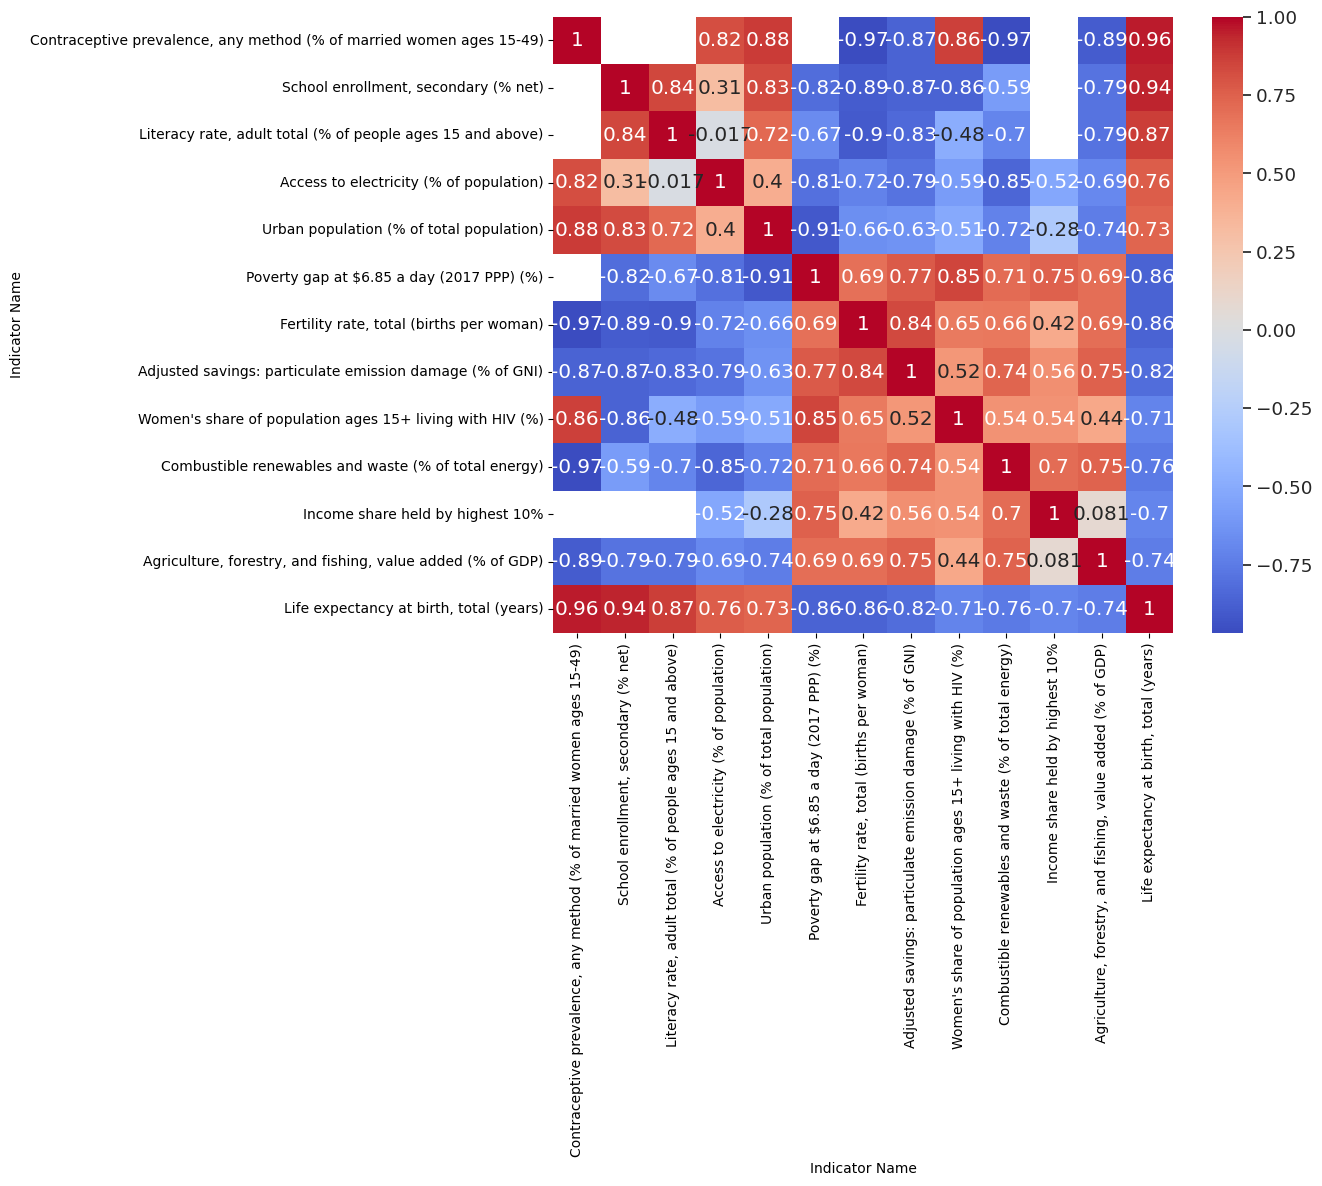

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_piv_select.corr(), annot=True, cmap='coolwarm',axes = ax)

The heatmap is used to see how the indocators are related to each other. We can see that the some indicators are more highly correlated to each other. For example, It is interesting to see that contraceptive prevalence is highly correlated to access to electricity and less correlated to agriculture,forestory, and fishing, value added. 

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

scaler_std = StandardScaler()
df_scaled_std = pd.DataFrame(scaler_std.fit_transform(df_piv_select), columns=df_piv_select.columns,
                             index=df_piv_select.index) 
imputer = SimpleImputer(strategy='mean')
df_std_imputed = imputer.fit_transform(df_scaled_std)

<ipython-input-17-038c39fd55fe>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0], x='Contraceptive prevalence, any method (% of married women ages 15-49)',y='Life expectancy at birth, total (years)', data = df_piv_select,cmap ="Reds",shade =False)
<ipython-input-17-038c39fd55fe>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], x='School enrollment, secondary (% net)',y='Life expectancy at birth, total (years)', data = df_piv_select, cmap="Reds",shade = False)
<ipython-input-17-038c39fd55fe>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[2],x='Literacy rate, adult total (% of people age

<Axes: xlabel='Literacy rate, adult total (% of people ages 15 and above)', ylabel='Life expectancy at birth, total (years)'>

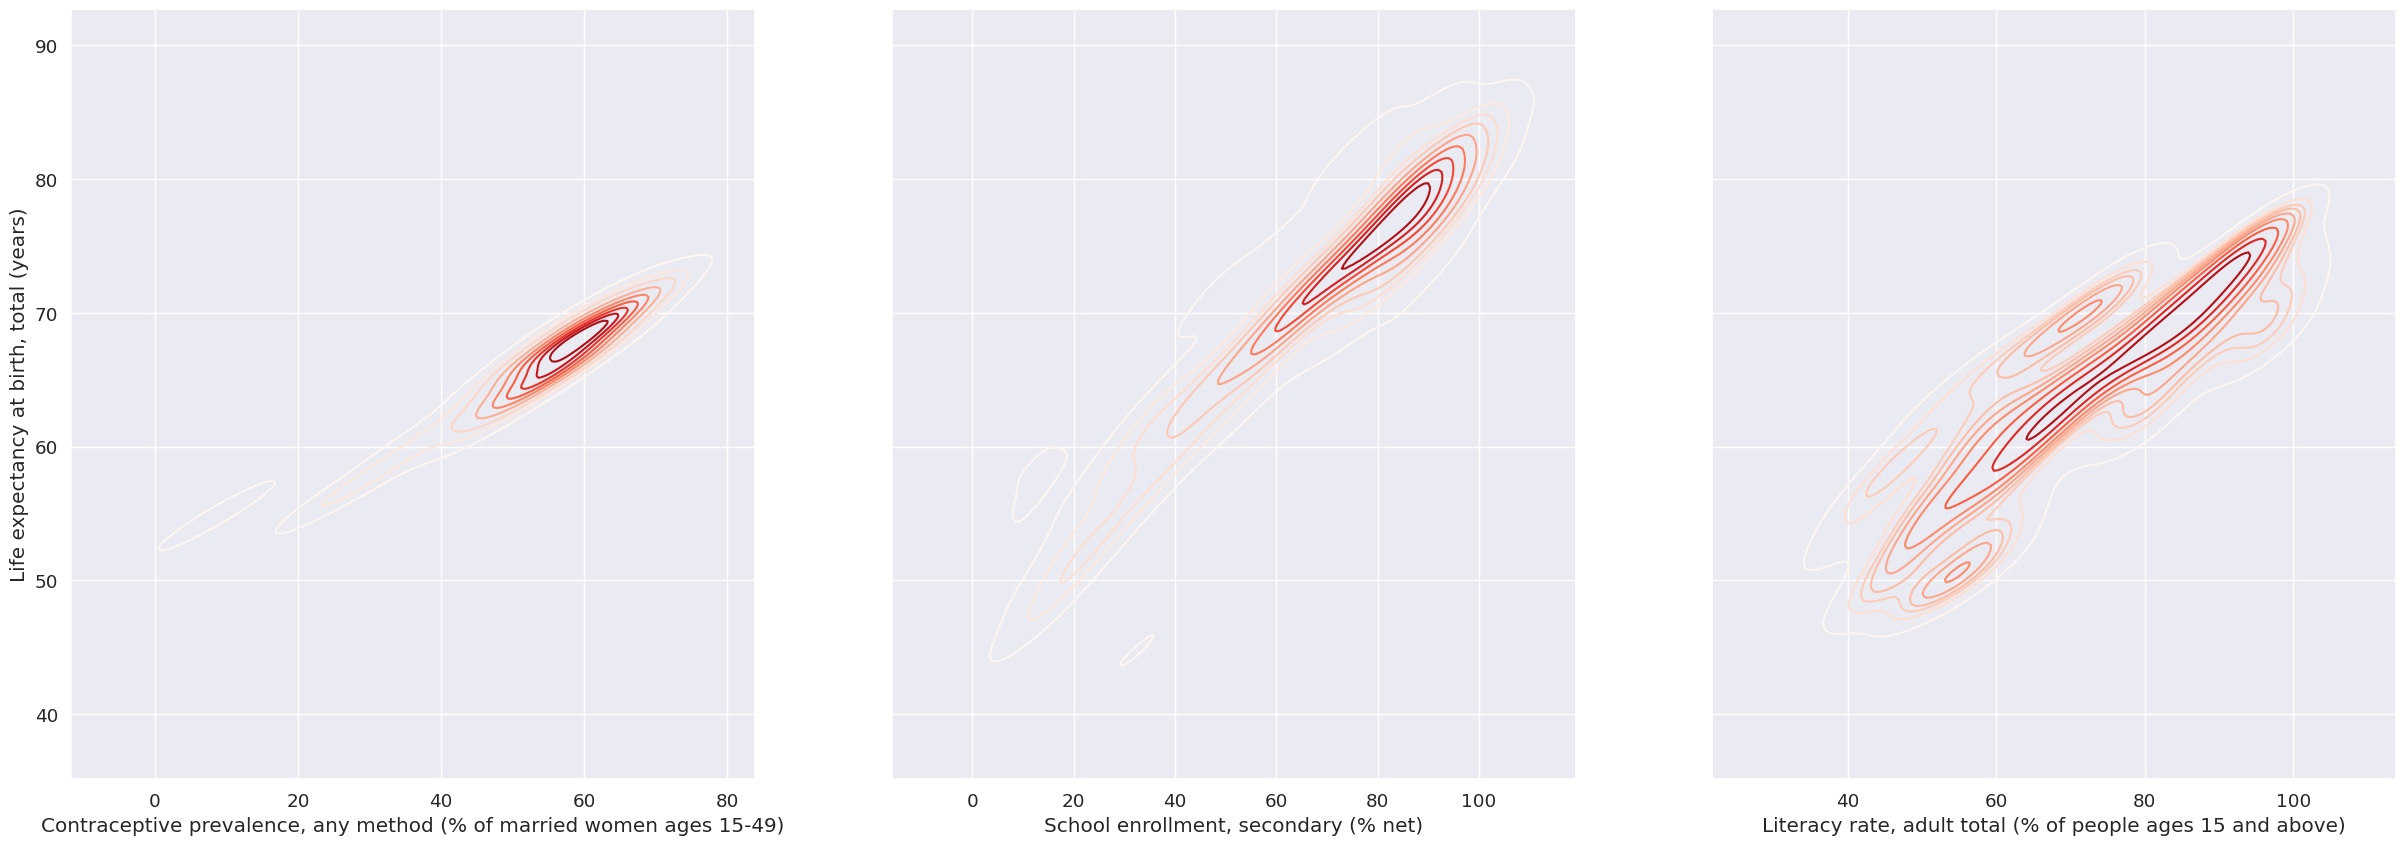

In [17]:
#kde plots to study the correlation between the different selected indicators and Life Expectancy
fig,axes = plt.subplots(1,3,figsize=(30,10),sharey = True)
fig.suptitle('')

sns.kdeplot(ax=axes[0], x='Contraceptive prevalence, any method (% of married women ages 15-49)',y='Life expectancy at birth, total (years)', data = df_piv_select,cmap ="Reds",shade =False)

sns.kdeplot(ax=axes[1], x='School enrollment, secondary (% net)',y='Life expectancy at birth, total (years)', data = df_piv_select, cmap="Reds",shade = False)

sns.kdeplot(ax=axes[2],x='Literacy rate, adult total (% of people ages 15 and above)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 


<ipython-input-18-da29b3e87527>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0],x='Access to electricity (% of population)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)
<ipython-input-18-da29b3e87527>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1],x='Urban population (% of total population)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)
<ipython-input-18-da29b3e87527>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[2],x='Poverty gap at $6.85 a day (2017 PPP) (%)', y = 'Life expectancy at bir

<Axes: xlabel='Poverty gap at $6.85 a day (2017 PPP) (%)', ylabel='Life expectancy at birth, total (years)'>

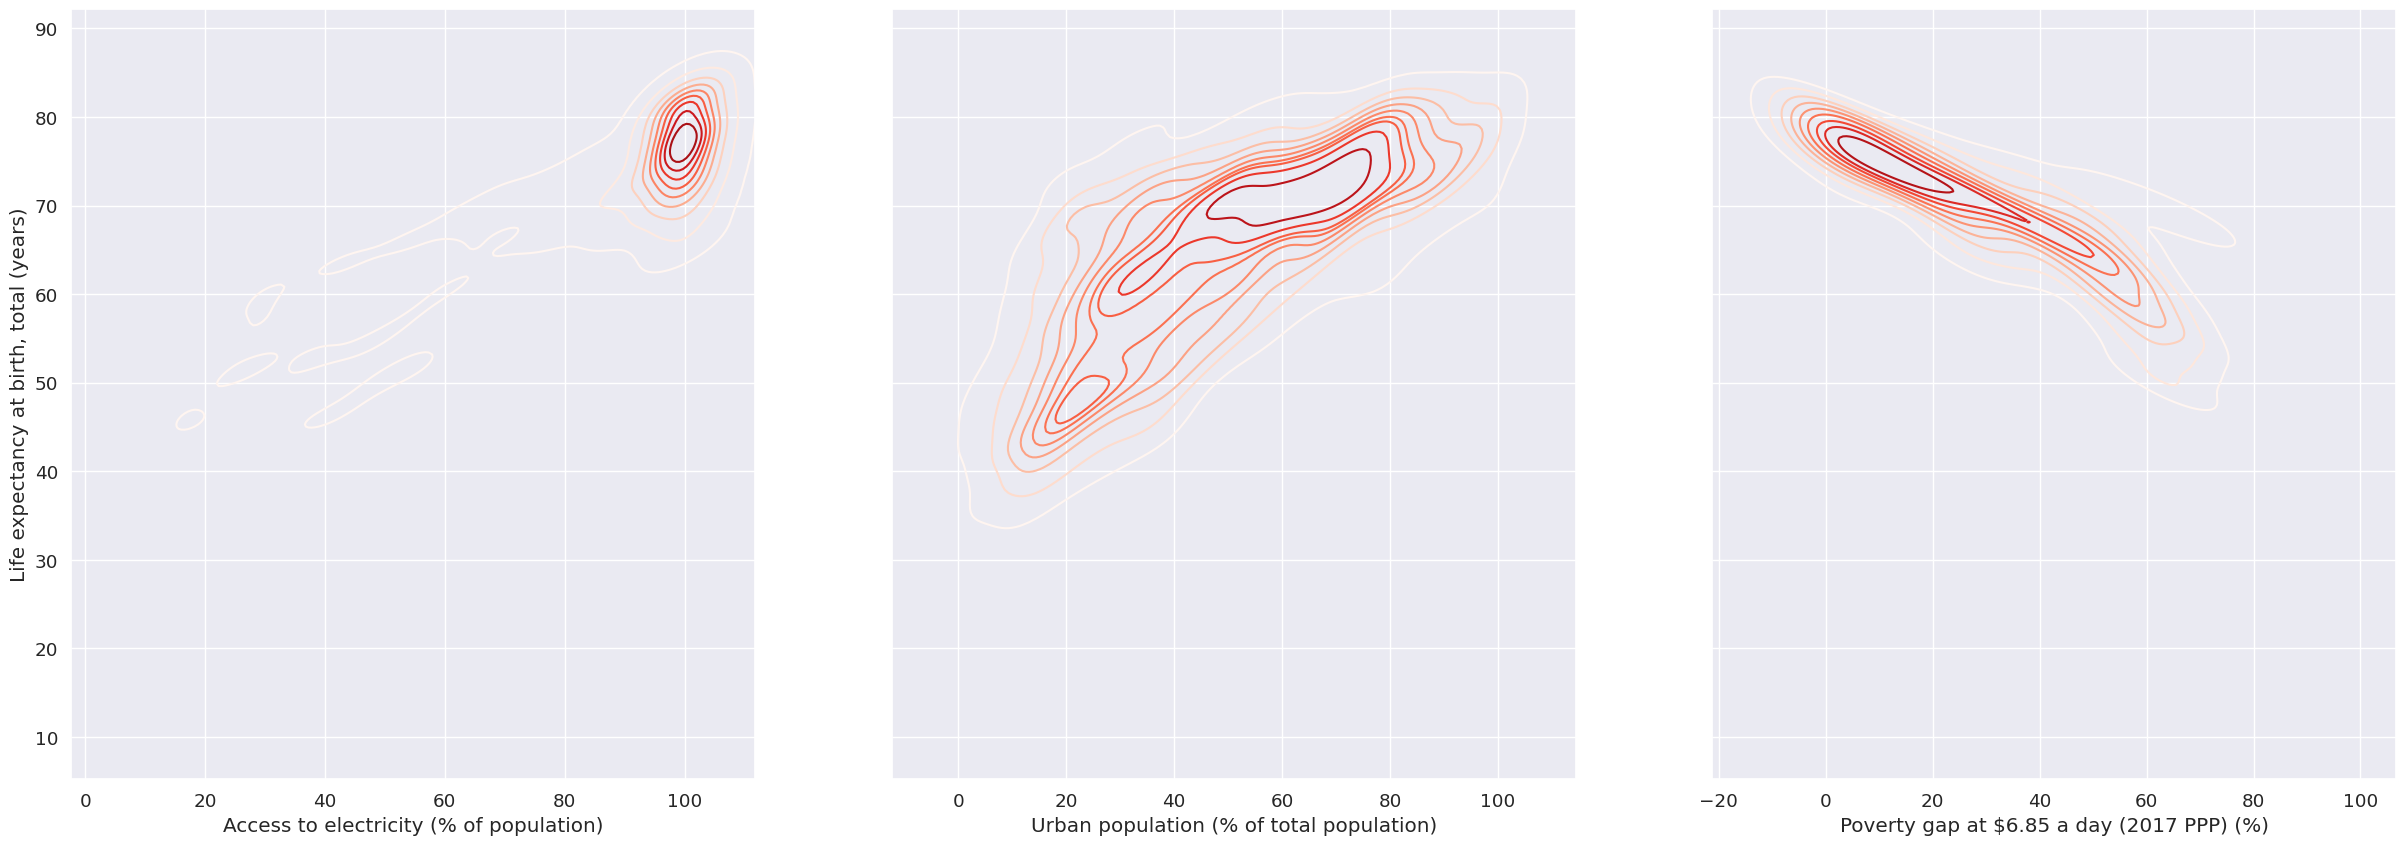

In [18]:
fig,axes = plt.subplots(1,3,figsize=(30,10),sharey = True)
fig.suptitle('')
sns.kdeplot(ax=axes[0],x='Access to electricity (% of population)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 

sns.kdeplot(ax=axes[1],x='Urban population (% of total population)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 

sns.kdeplot(ax=axes[2],x='Poverty gap at $6.85 a day (2017 PPP) (%)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 

<ipython-input-19-8a6d5ef696ea>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0],x='Fertility rate, total (births per woman)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)
<ipython-input-19-8a6d5ef696ea>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1],x='Adjusted savings: particulate emission damage (% of GNI)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)
<ipython-input-19-8a6d5ef696ea>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[2],x="Women's share of population ages 15+ living with HIV (

<Axes: xlabel="Women's share of population ages 15+ living with HIV (%)", ylabel='Life expectancy at birth, total (years)'>

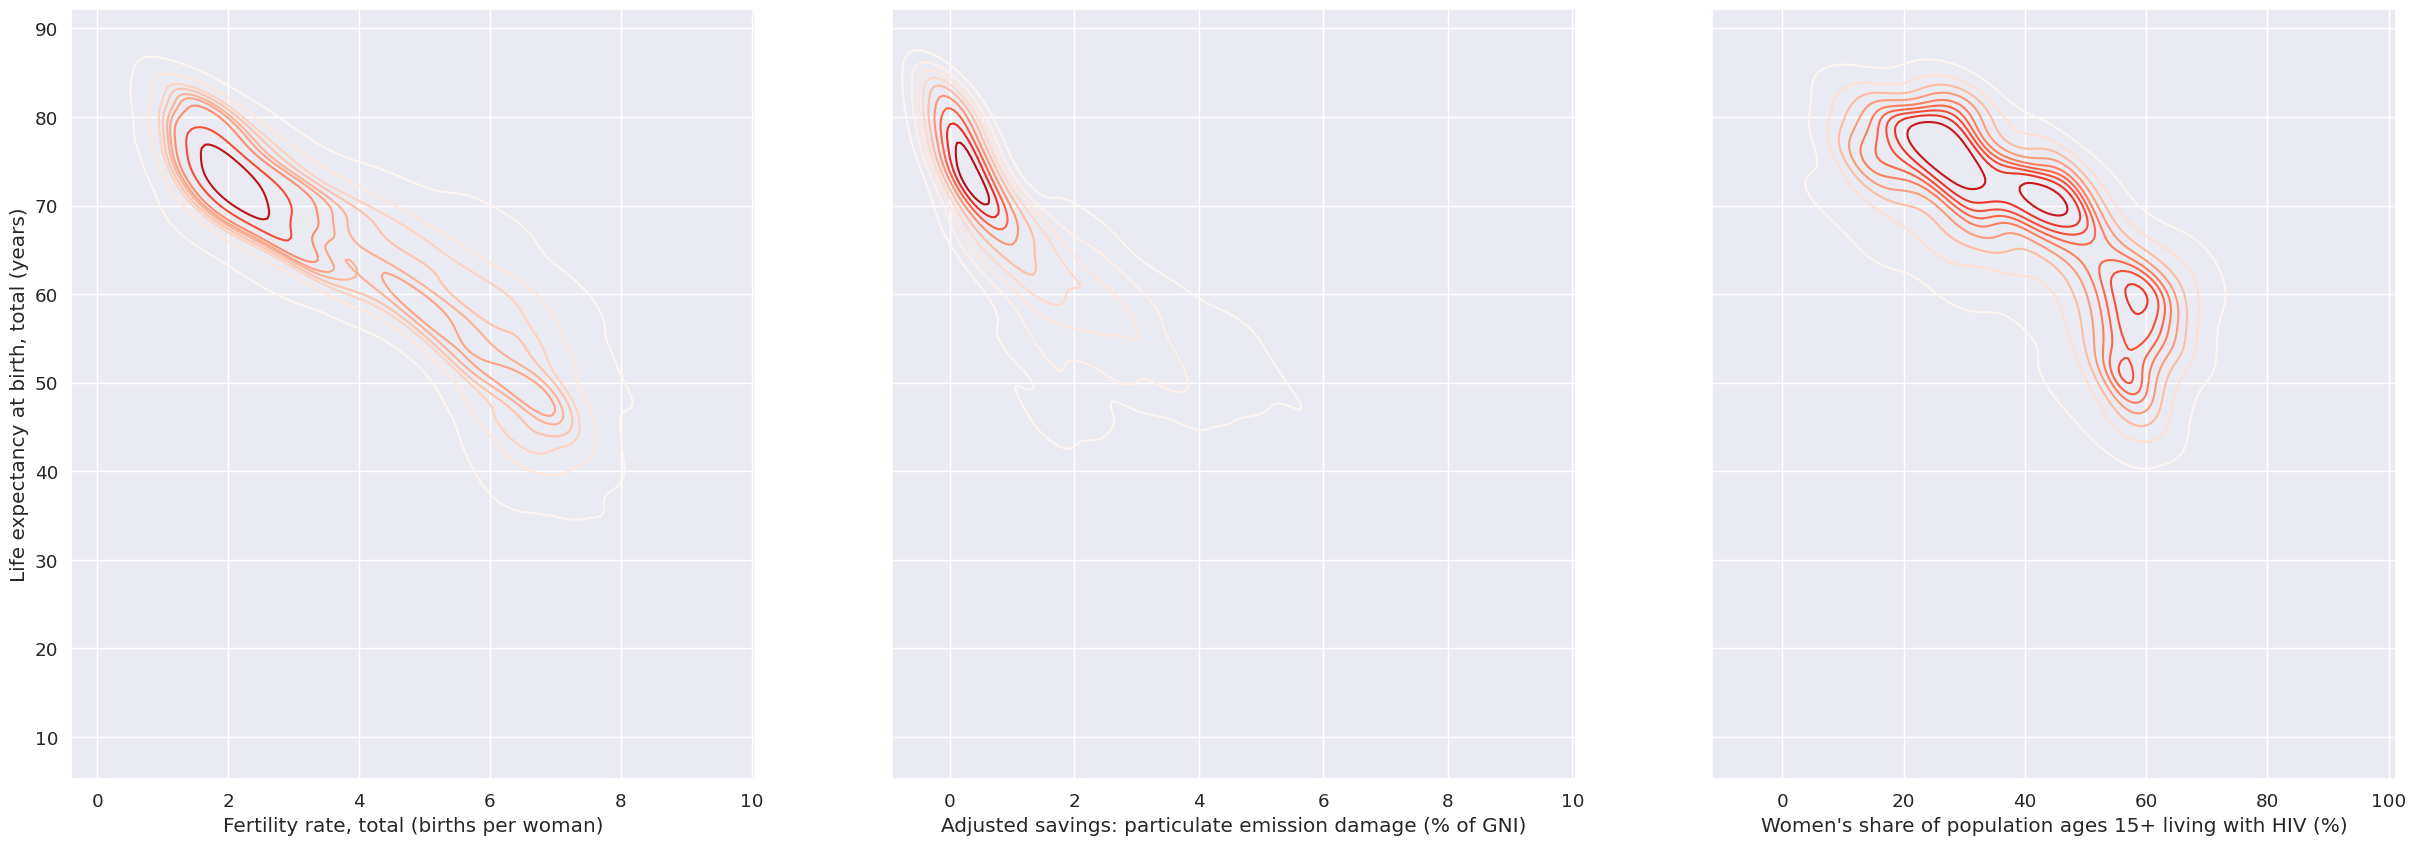

In [19]:
fig,axes = plt.subplots(1,3,figsize=(30,10),sharey = True)
fig.suptitle('')
sns.kdeplot(ax=axes[0],x='Fertility rate, total (births per woman)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 

sns.kdeplot(ax=axes[1],x='Adjusted savings: particulate emission damage (% of GNI)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False) 

sns.kdeplot(ax=axes[2],x="Women's share of population ages 15+ living with HIV (%)", y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)

<ipython-input-20-bcdc2c2de3b2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[0], x='Combustible renewables and waste (% of total energy)',y='Life expectancy at birth, total (years)', data = df_piv_select,cmap ="Reds",shade =False)
<ipython-input-20-bcdc2c2de3b2>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], x='Income share held by highest 10%',y='Life expectancy at birth, total (years)', data = df_piv_select, cmap="Reds",shade = False)
<ipython-input-20-bcdc2c2de3b2>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[2],x='Agriculture, forestry, and fishing, value added (% of GDP)', y 

<Axes: xlabel='Agriculture, forestry, and fishing, value added (% of GDP)', ylabel='Life expectancy at birth, total (years)'>

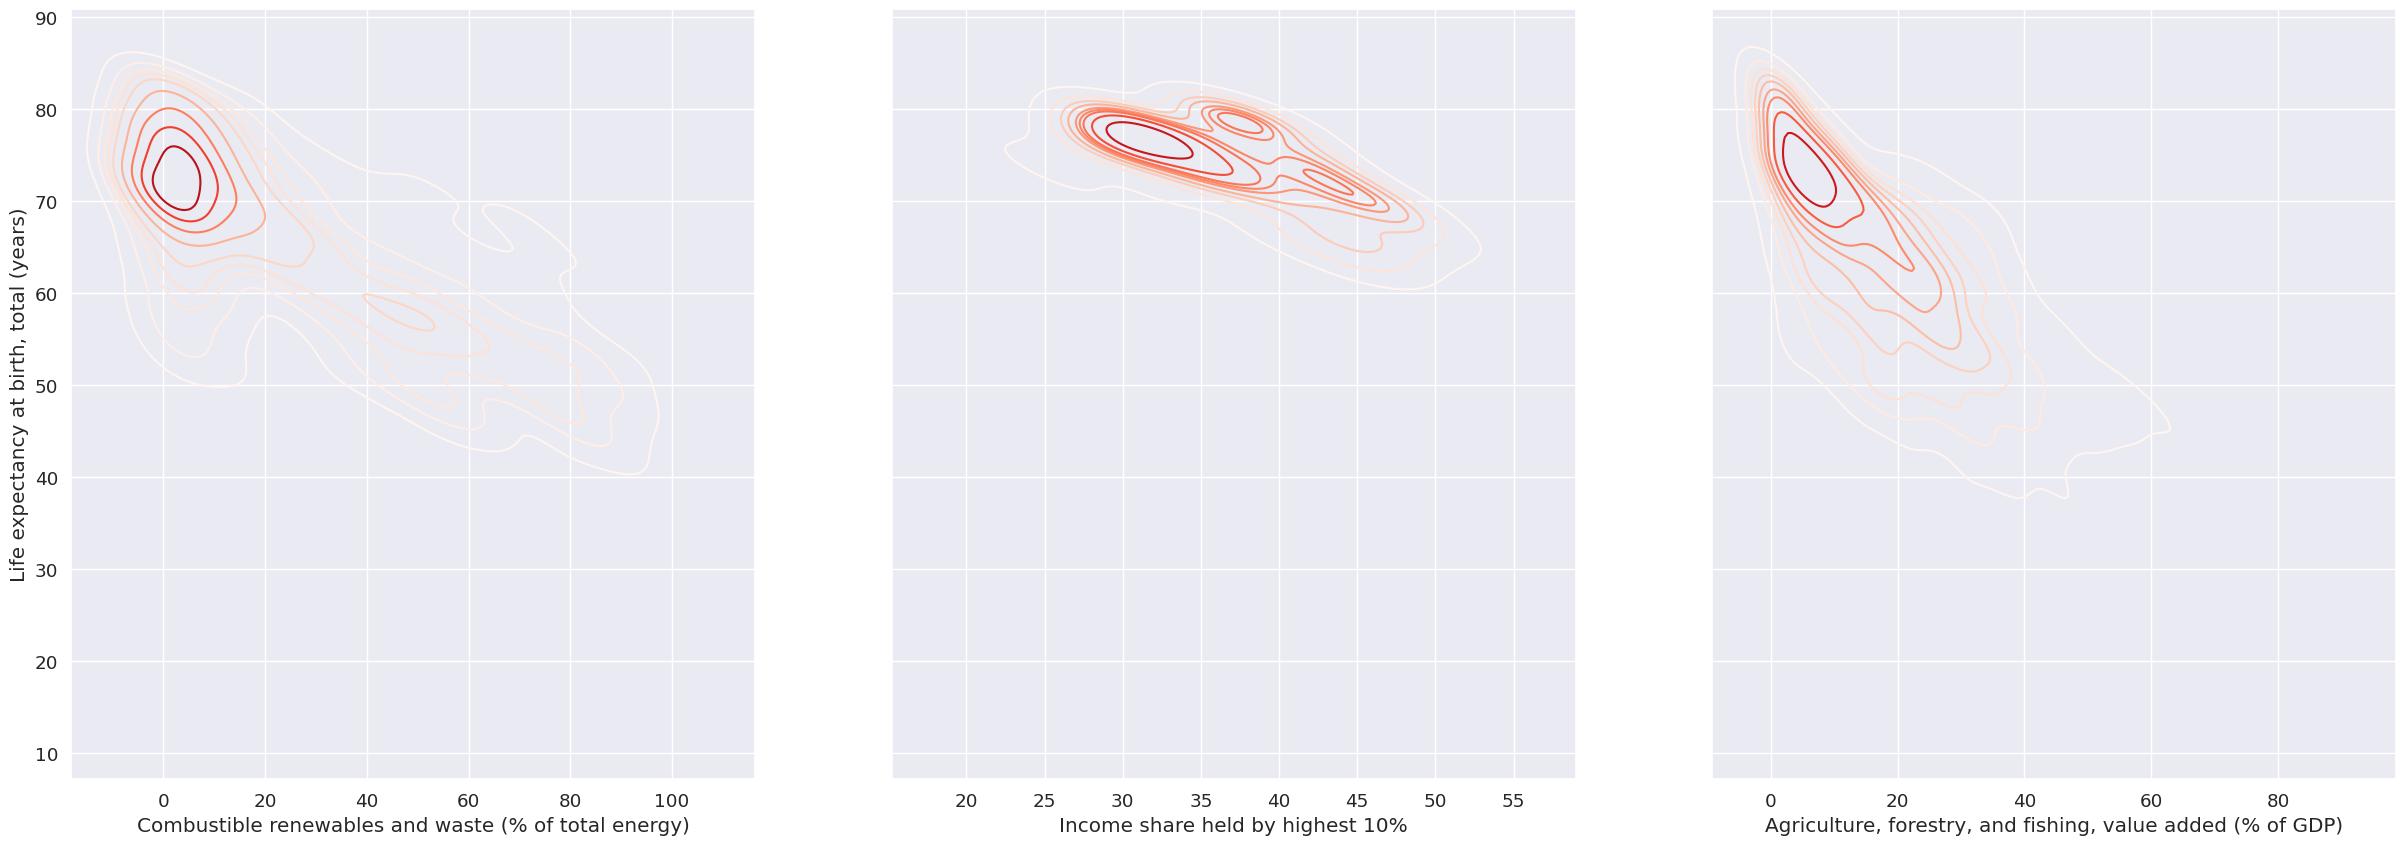

In [20]:
fig,axes = plt.subplots(1,3,figsize=(30,10),sharey = True)
fig.suptitle('')

sns.kdeplot(ax=axes[0], x='Combustible renewables and waste (% of total energy)',y='Life expectancy at birth, total (years)', data = df_piv_select,cmap ="Reds",shade =False)

sns.kdeplot(ax=axes[1], x='Income share held by highest 10%',y='Life expectancy at birth, total (years)', data = df_piv_select, cmap="Reds",shade = False)

sns.kdeplot(ax=axes[2],x='Agriculture, forestry, and fishing, value added (% of GDP)', y = 'Life expectancy at birth, total (years)', data= df_piv_select,cmap="Reds",shade=False)


### B) How have these relationships changed over time?

In [21]:
health_outcome = "Life expectancy at birth, total (years)"

predictors = ['Contraceptive prevalence, any method (% of married women ages 15-49)',
              'School enrollment, secondary (% net)', 
              'Literacy rate, adult total (% of people ages 15 and above)',
              'Access to electricity (% of population)',
              'Urban population (% of total population)',
              'Poverty gap at $6.85 a day (2017 PPP) (%)',
              'Fertility rate, total (births per woman)',
              'Adjusted savings: particulate emission damage (% of GNI)',
              "Women's share of population ages 15+ living with HIV (%)",
              'Combustible renewables and waste (% of total energy)',
              'Income share held by highest 10%',
              'Agriculture, forestry, and fishing, value added (% of GDP)',
              'Life expectancy at birth, total (years)']


In [22]:
#This cell finds the country that has data in most of the predictors
df_predictors = df_pivot[predictors]
country_counts = df_predictors.count(level="Country Name")
sorted_counts = country_counts.sum(axis=1).sort_values(ascending=False)
print(f"The country with the most data for the predictors is {sorted_counts.index[0]} with {sorted_counts.iloc[0]} predictors.")

The country with the most data for the predictors is Brazil with 456 predictors.


<ipython-input-22-c8f5a7db10b2>:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.count(level=1) should use df.groupby(level=1).count().
  country_counts = df_predictors.count(level="Country Name")


This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

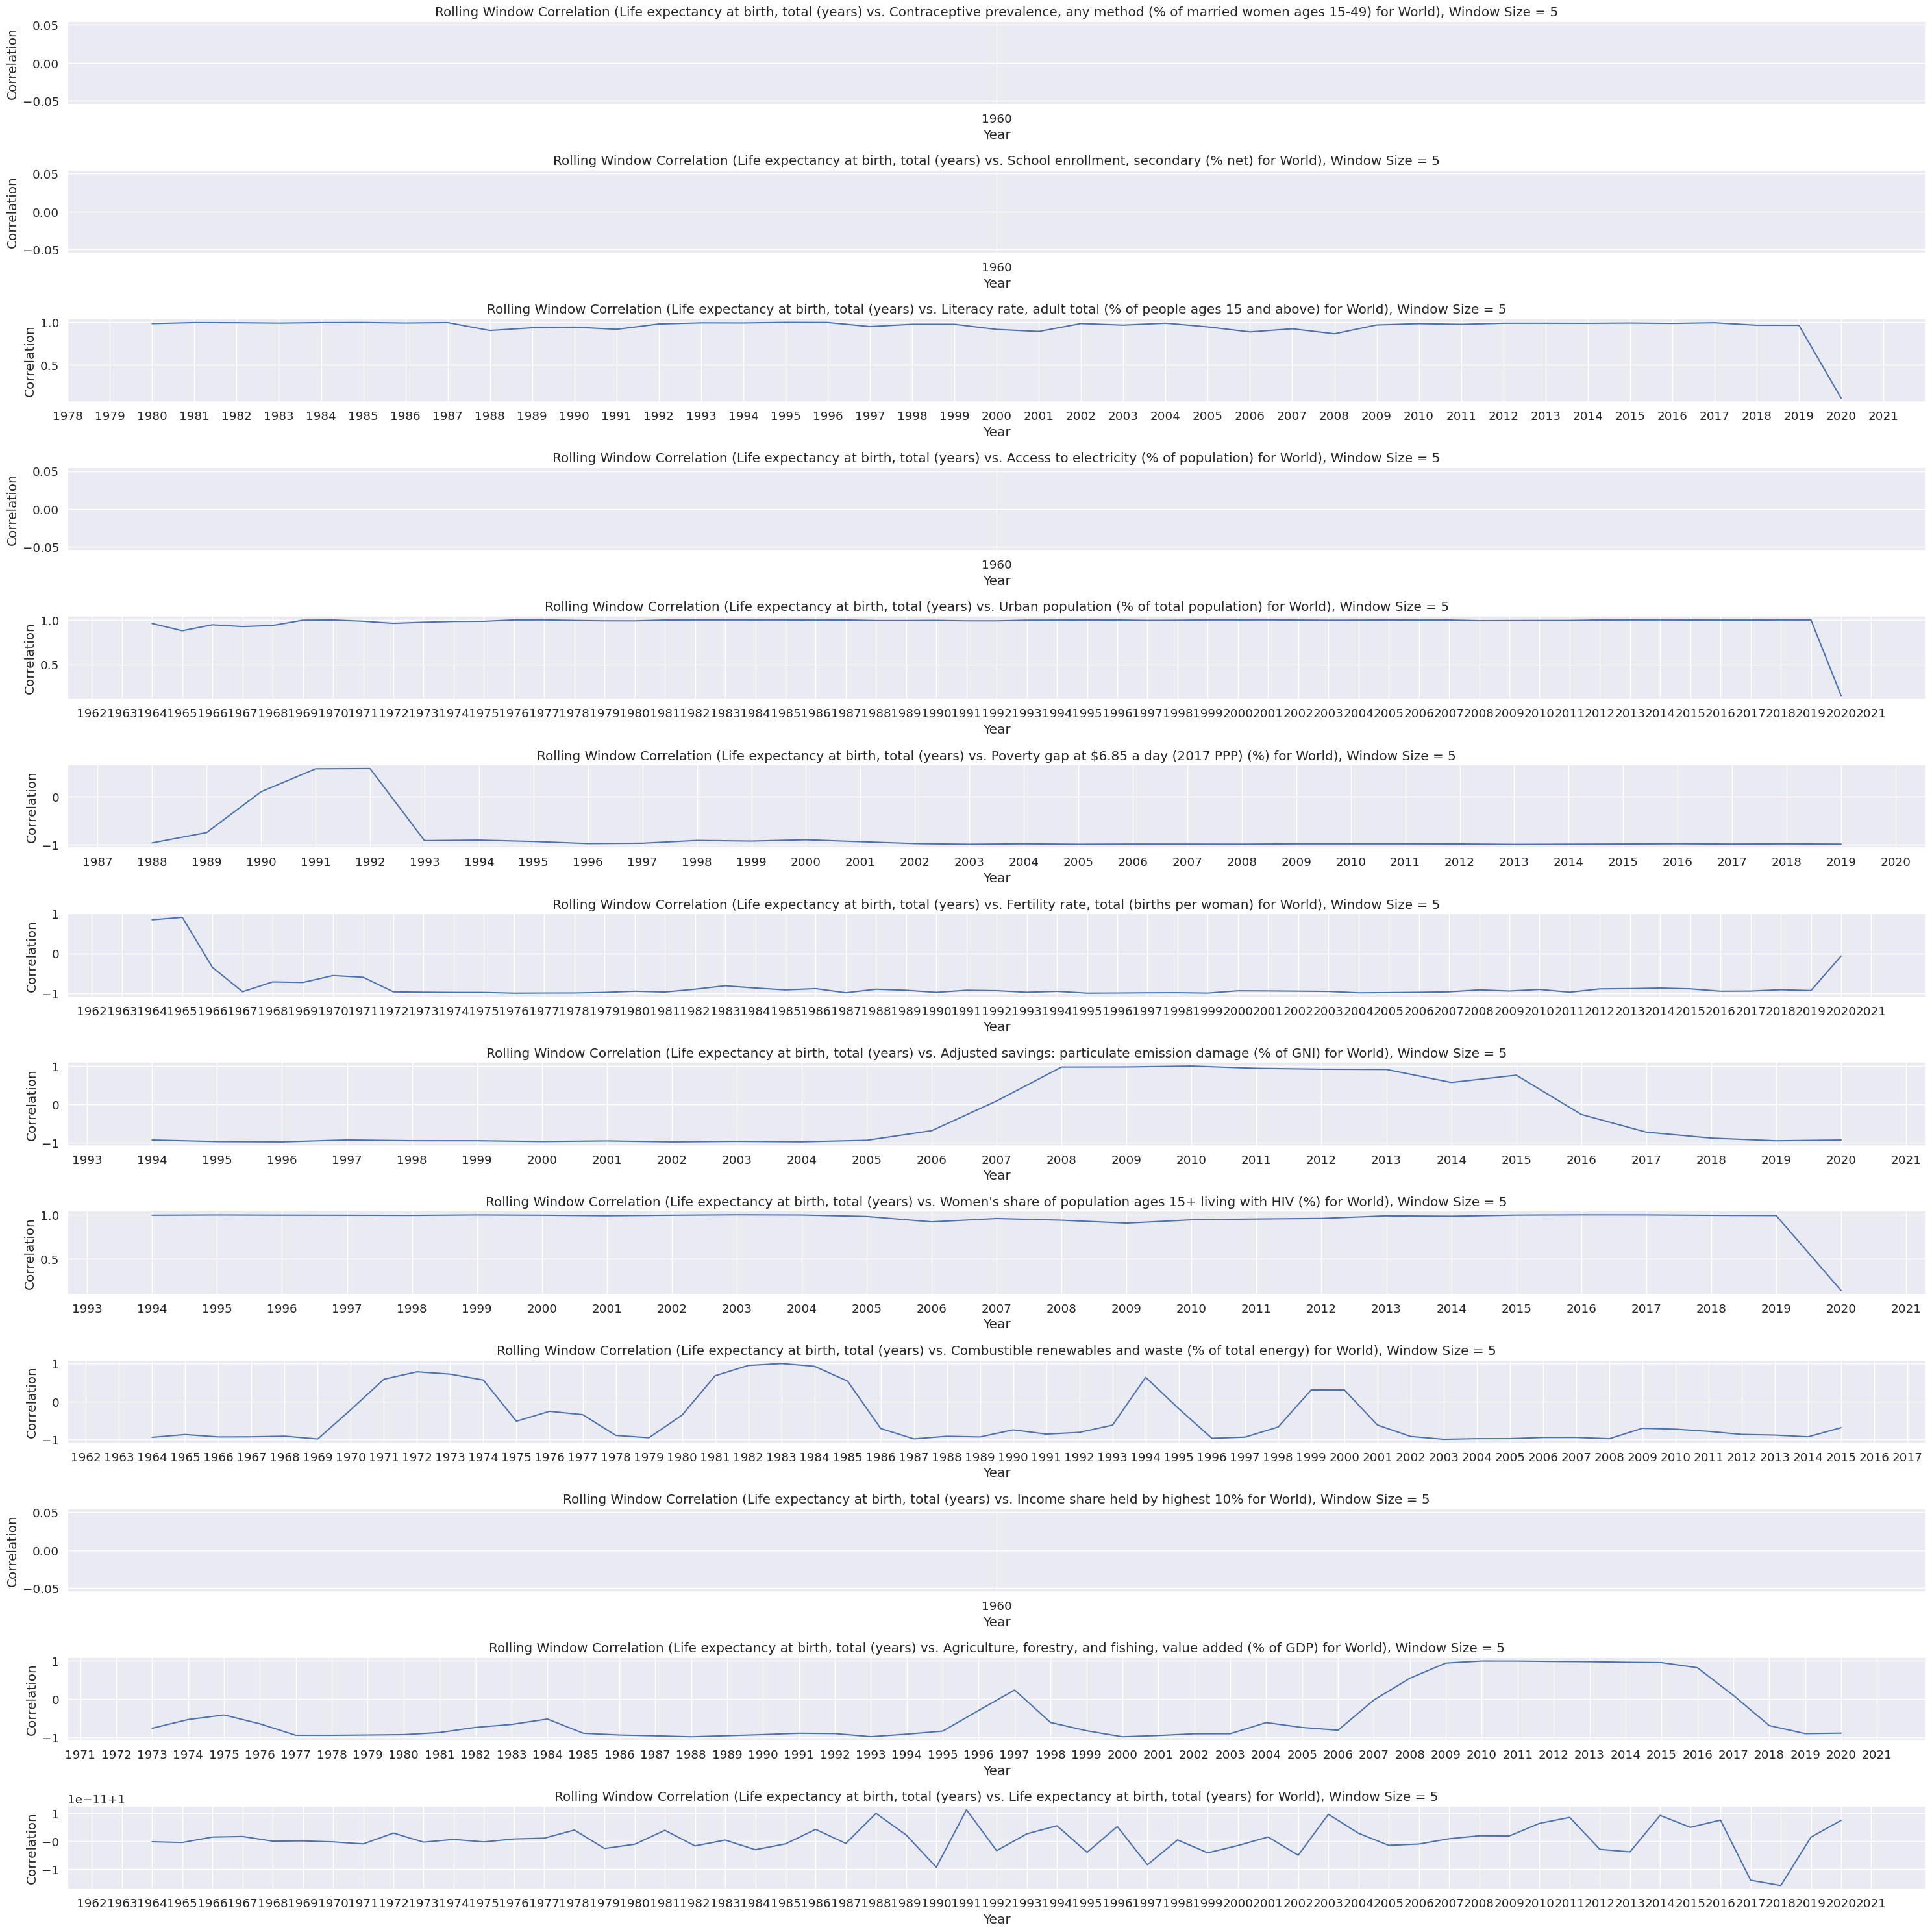

In [23]:
#Correlation with a rolling window size has been created to check how the correlation changed over time.
country = "World"
df_health_outcome = df_pivot.loc[df_pivot.index.get_level_values('Country Name') == country, health_outcome].reset_index()
fig, axs = plt.subplots(nrows=len(predictors), ncols=1, figsize=(30, 30))

# compute rolling window correlations for each predictor
for i, predictor in enumerate(predictors):
    df_predictor = df_pivot.loc[df_pivot.index.get_level_values('Country Name') == country, predictor].reset_index()
    window_size = 5
    rolling_corr = df_health_outcome.set_index("Year")[health_outcome].rolling(window_size).corr(df_predictor.set_index("Year")[predictor])
    axs[i].plot(rolling_corr.index, rolling_corr.values)
    axs[i].set_title(f"Rolling Window Correlation ({health_outcome} vs. {predictor} for {country}), Window Size = {window_size}")
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Correlation")
    
fig.tight_layout()

### Question 2: Can we develop a predictive model to estimate a country’s GDP per capita based on the indicators?




In [24]:
df_melt = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')

df_melt = df_melt.dropna()
display(df_melt.head())
display(df_melt.shape)

Country Name Country Code  \
14  Africa Eastern and Southern          AFE   
15  Africa Eastern and Southern          AFE   
16  Africa Eastern and Southern          AFE   
17  Africa Eastern and Southern          AFE   
35  Africa Eastern and Southern          AFE   

                                       Indicator Name  Indicator Code  Year  \
14  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
15  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
16  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   
17  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG  1960   
35               Aquaculture production (metric tons)  ER.FSH.AQUA.MT  1960   

         Value  
14  141.457567  
15   89.594604  
16    5.626944  
17   83.668705  
35  380.000000

(5984759, 6)

In [25]:
df_subset = df_melt[['Country Name', 'Indicator Name', 'Year', 'Value']]
df_pivot = df_subset.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value', aggfunc='first')
correlations = df_pivot.corr()["GDP per capita (current US$)"]
correlations_sorted = correlations.sort_values(ascending=False)

In [26]:
print(correlations_sorted.head(50))
top_correlated = correlations.nlargest(50).index.values.tolist()
df_pivot = df_pivot.loc[:,top_correlated]

Indicator Name
GDP per capita (current US$)                                                                        1.000000
GNI per capita, Atlas method (current US$)                                                          0.990545
Adjusted net national income per capita (current US$)                                               0.948560
GNI per capita (constant 2015 US$)                                                                  0.921949
GNI per capita, PPP (constant 2017 international $)                                                 0.919646
Adjusted net national income per capita (constant 2015 US$)                                         0.912376
GDP per capita, PPP (constant 2017 international $)                                                 0.905214
GDP per capita (constant 2015 US$)                                                                  0.904536
GNI per capita, PPP (current international $)                                                       0.901166
GDP 

In [27]:
display(df_pivot.head())
display(df_pivot.shape)

Indicator Name     GDP per capita (current US$)  \
Country Name Year                                 
Afghanistan  1960                     62.369375   
             1961                     62.443703   
             1962                     60.950364   
             1963                     82.021738   
             1964                     85.511073   

Indicator Name     GNI per capita, Atlas method (current US$)  \
Country Name Year                                               
Afghanistan  1960                                         NaN   
             1961                                         NaN   
             1962                                         NaN   
             1963                                         NaN   
             1964                                         NaN   

Indicator Name     Adjusted net national income per capita (current US$)  \
Country Name Year                                                          
Afghanistan  1960                                                NaN       
             1961                                                NaN       
             1962                                                NaN       
             1963                                                NaN       
             1964                                                NaN       

Indicator Name     GNI per capita (constant 2015 US$)  \
Country Name Year                                       
Afghanistan  1960                                 NaN   
             1961                                 NaN   
             1962                                 NaN   
             1963                                 NaN   
             1964                                 NaN   

Indicator Name     GNI per capita, PPP (constant 2017 international $)  \
Country Name Year                                                        
Afghanistan  1960                                                NaN     
             1961                                                NaN     
             1962                                                NaN     
             1963                                                NaN     
             1964                                                NaN     

Indicator Name     Adjusted net national income per capita (constant 2015 US$)  \
Country Name Year                                                                
Afghanistan  1960                                                NaN             
             1961                                                NaN             
             1962                                                NaN             
             1963                                                NaN             
             1964                                                NaN             

Indicator Name     GDP per capita, PPP (constant 2017 international $)  \
Country Name Year                                                        
Afghanistan  1960                                                NaN     
             1961                                                NaN     
             1962                                                NaN     
             1963                                                NaN     
             1964                                                NaN     

Indicator Name     GDP per capita (constant 2015 US$)  \
Country Name Year                                       
Afghanistan  1960                                 NaN   
             1961                                 NaN   
             1962                                 NaN   
             1963                                 NaN   
             1964                                 NaN   

Indicator Name     GNI per capita, PPP (current international $)  \
Country Name Year                                                  
Afghanistan  1960                                            NaN   
             1961                   

(16430, 50)

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

scaler_std = StandardScaler()
df_scaled_std = pd.DataFrame(scaler_std.fit_transform(df_pivot), columns=df_pivot.columns,
                             index=df_pivot.index)
display(df_scaled_std.shape)
df_scaled_std = df_scaled_std.dropna(how='all')
display(df_scaled_std.shape)

y = df_scaled_std['GDP per capita (current US$)']
df_scaled_std = df_scaled_std.drop('GDP per capita (current US$)', axis=1)
display(df_scaled_std.head())

imputer = SimpleImputer(strategy='mean')
df_std_imputed = imputer.fit_transform(df_scaled_std)


(16430, 50)

(16430, 50)

Indicator Name     GNI per capita, Atlas method (current US$)  \
Country Name Year                                               
Afghanistan  1960                                         NaN   
             1961                                         NaN   
             1962                                         NaN   
             1963                                         NaN   
             1964                                         NaN   

Indicator Name     Adjusted net national income per capita (current US$)  \
Country Name Year                                                          
Afghanistan  1960                                                NaN       
             1961                                                NaN       
             1962                                                NaN       
             1963                                                NaN       
             1964                                                NaN       

Indicator Name     GNI per capita (constant 2015 US$)  \
Country Name Year                                       
Afghanistan  1960                                 NaN   
             1961                                 NaN   
             1962                                 NaN   
             1963                                 NaN   
             1964                                 NaN   

Indicator Name     GNI per capita, PPP (constant 2017 international $)  \
Country Name Year                                                        
Afghanistan  1960                                                NaN     
             1961                                                NaN     
             1962                                                NaN     
             1963                                                NaN     
             1964                                                NaN     

Indicator Name     Adjusted net national income per capita (constant 2015 US$)  \
Country Name Year                                                                
Afghanistan  1960                                                NaN             
             1961                                                NaN             
             1962                                                NaN             
             1963                                                NaN             
             1964                                                NaN             

Indicator Name     GDP per capita, PPP (constant 2017 international $)  \
Country Name Year                                                        
Afghanistan  1960                                                NaN     
             1961                                                NaN     
             1962                                                NaN     
             1963                                                NaN     
             1964                                                NaN     

Indicator Name     GDP per capita (constant 2015 US$)  \
Country Name Year                                       
Afghanistan  1960                                 NaN   
             1961                                 NaN   
             1962                                 NaN   
             1963                                 NaN   
             1964                                 NaN   

Indicator Name     GNI per capita, PPP (current international $)  \
Country Name Year                                                  
Afghanistan  1960                                            NaN   
             1961                                            NaN   
             1962                                            NaN   
             1963                                            NaN   
             1964                                            NaN   

Indicator Name     GDP per capita, PPP (current international $)  \
Country Name Year                                    

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [29]:
pca = PCA(n_components=len(df_scaled_std.columns))
pca.fit(df_std_imputed)

variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

n_components = 49
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_std_imputed)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i+1) for i in range(n_components)])

[5.89307595e-01 1.05931138e-01 5.22471265e-02 3.18376826e-02
 2.63343857e-02 2.22136902e-02 2.03760101e-02 1.65292207e-02
 1.43913989e-02 1.34027412e-02 1.19567723e-02 1.03563856e-02
 9.26783414e-03 8.21433104e-03 8.06184478e-03 7.36274059e-03
 7.15793235e-03 5.36328764e-03 4.86998087e-03 4.72790730e-03
 4.10157356e-03 3.63990174e-03 3.46584195e-03 2.36309382e-03
 2.07771853e-03 1.90617741e-03 1.68129490e-03 1.61679581e-03
 1.51849053e-03 1.47760146e-03 1.23053399e-03 9.54661132e-04
 9.01428291e-04 7.81049821e-04 5.34819521e-04 4.43179896e-04
 3.00829345e-04 2.39922637e-04 2.17160841e-04 1.28139573e-04
 1.16779313e-04 1.07940082e-04 8.83042743e-05 8.47242943e-05
 5.68070223e-05 4.38548122e-05 7.62044015e-06 2.20453435e-06
 1.54534127e-06]


In [30]:
display(df_pca.head())
display(y)
print(y.isnull().sum())

df_pca = df_pca[y.notnull().values]
y = y[y.notnull().values]
display(y.shape)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.138916  1.041735 -0.118114  0.207976  0.423052 -0.048528 -0.640857   
1 -2.151683  1.049414 -0.117414  0.203015  0.438442 -0.045817 -0.632925   
2 -2.164904  1.057720 -0.117114  0.198145  0.451918 -0.042808 -0.625694   
3 -2.181935  1.061687 -0.111406  0.195193  0.482158 -0.040163 -0.647246   
4 -2.193674  1.070834 -0.112804  0.190950  0.488063 -0.037224 -0.635514   

        PC8       PC9      PC10  ...      PC40      PC41      PC42      PC43  \
0 -0.108535 -0.202764 -0.205642  ...  0.043050 -0.004765  0.007423  0.000536   
1 -0.107106 -0.195066 -0.201280  ...  0.040085 -0.004583  0.007552  0.000580   
2 -0.105399 -0.188892 -0.197454  ...  0.036520 -0.004339  0.007686  0.000637   
3 -0.103811 -0.194907 -0.202856  ...  0.033230 -0.004167  0.008198  0.000731   
4 -0.101885 -0.188592 -0.198333  ...  0.030589 -0.003962  0.008214  0.000765   

       PC44      PC45      PC46      PC47      PC48      PC49  
0 -0.003442 -0.001071 -0.000233  0.000820 -0.000241 -0.005211  
1 -0.003327 -0.001038 -0.000243  0.000816 -0.000221 -0.004994  
2 -0.003230 -0.001001 -0.000258  0.000807 -0.000201 -0.004775  
3 -0.003210 -0.001038 -0.000312  0.000819 -0.000173 -0.004535  
4 -0.003147 -0.000980 -0.000322  0.000806 -0.000155 -0.004334  

[5 rows x 49 columns]

Country Name  Year
Afghanistan   1960   -0.474079
              1961   -0.474075
              1962   -0.474167
              1963   -0.472863
              1964   -0.472647
                        ...   
Zimbabwe      2017   -0.404149
              2018   -0.337478
              2019   -0.389927
              2020   -0.392970
              2021   -0.368135
Name: GDP per capita (current US$), Length: 16430, dtype: float64

3934


(12496,)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R-squared: ", r2)

Mean squared error:  0.08932872319936971
Mean absolute error:  0.18245751497072357
R-squared:  0.881661009241983


###Question 3: Are there clusters of countries based on their economic and social indicators? What are the factors that explain their differences? 

In [32]:
display(df_melt.head())
display(df_melt.shape)

Country Name Country Code  \
14  Africa Eastern and Southern          AFE   
15  Africa Eastern and Southern          AFE   
16  Africa Eastern and Southern          AFE   
17  Africa Eastern and Southern          AFE   
35  Africa Eastern and Southern          AFE   

                                       Indicator Name  Indicator Code  Year  \
14  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
15  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
16  Age dependency ratio, old (% of working-age po...  SP.POP.DPND.OL  1960   
17  Age dependency ratio, young (% of working-age ...  SP.POP.DPND.YG  1960   
35               Aquaculture production (metric tons)  ER.FSH.AQUA.MT  1960   

         Value  
14  141.457567  
15   89.594604  
16    5.626944  
17   83.668705  
35  380.000000

(5984759, 6)

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


#Picking the most important indicators that are related to ecomony and social aspects of countries (These indicators were research and selected manually)
indicators = ["GDP (current US$)", 
              "GDP per capita (current US$)", "GDP growth (annual %)",
              "Unemployment, total (% of total labor force) (modeled ILO estimate)",
              "Inflation, consumer prices (annual %)",
              "Life expectancy at birth, total (years)", 
              "School enrollment, primary (% gross)",
              'Agriculture, forestry, and fishing, value added (% of GDP)']


data = df_melt.loc[df_melt['Indicator Name'].isin(indicators)].drop(['Indicator Code','Country Code'], axis=1)
data = data.dropna()
data = data.pivot(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()

display(data.head())
display(data.shape)
display(data.isna().sum())

Indicator Name Country Name  Year  \
0               Afghanistan  1960   
1               Afghanistan  1961   
2               Afghanistan  1962   
3               Afghanistan  1963   
4               Afghanistan  1964   

Indicator Name  Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                                             NaN            
1                                                             NaN            
2                                                             NaN            
3                                                             NaN            
4                                                             NaN            

Indicator Name  GDP (current US$)  GDP growth (annual %)  \
0                    5.377778e+08                    NaN   
1                    5.488889e+08                    NaN   
2                    5.466667e+08                    NaN   
3                    7.511112e+08                    NaN   
4                    8.000000e+08                    NaN   

Indicator Name  GDP per capita (current US$)  \
0                                  62.369375   
1                                  62.443703   
2                                  60.950364   
3                                  82.021738   
4                                  85.511073   

Indicator Name  Inflation, consumer prices (annual %)  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

Indicator Name  Life expectancy at birth, total (years)  \
0                                                32.535   
1                                                33.068   
2                                                33.547   
3                                                34.016   
4                                                34.494   

Indicator Name  School enrollment, primary (% gross)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

Indicator Name  Unemployment, total (% of total labor force) (modeled ILO estimate)  
0                                                             NaN                    
1                                                             NaN                    
2                                                             NaN                    
3                                                             NaN                    
4                                                             NaN

(15773, 10)

Indicator Name
Country Name                                                              0
Year                                                                      0
Agriculture, forestry, and fishing, value added (% of GDP)             7211
GDP (current US$)                                                      3277
GDP growth (annual %)                                                  4123
GDP per capita (current US$)                                           3277
Inflation, consumer prices (annual %)                                  6282
Life expectancy at birth, total (years)                                 680
School enrollment, primary (% gross)                                   6107
Unemployment, total (% of total labor force) (modeled ILO estimate)    8488
dtype: int64

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [34]:
from sklearn.preprocessing import PolynomialFeatures

#Using the average of values in order to reduce the dimensions of the data 
X_avg = data[indicators].mean(axis=1)
display(X_avg)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_avg.values.reshape(-1, 1))

#Using imputer to fill the empty cells
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

#Since the number of features that are being used are limited, a PolynomialFeature is used to create new features out of the current ones.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

X_poly = pd.DataFrame(X_poly)
X_poly = X_poly.fillna(X_poly.mean())

0        1.792593e+08
1        1.829630e+08
2        1.822223e+08
3        2.503704e+08
4        2.666667e+08
             ...     
15768    2.512127e+09
15769    4.879439e+09
15770    3.118891e+09
15771    3.072814e+09
15772    4.728540e+09
Length: 15773, dtype: float64

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

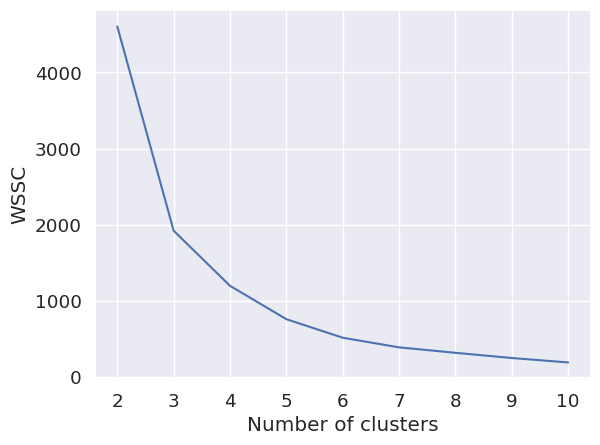

In [35]:
#Using elbow method to check the best number of clusters that can be used.
WCSS = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(X_imputed)
  WCSS.append(kmeans.inertia_)


plt.plot(range(2, 11), WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WSSC')
plt.show()

In [36]:
#KMean is used to cluster countries based on the indicators.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_imputed)
data['cluster'] = kmeans.labels_

display(data['cluster'].value_counts())
display(kmeans.cluster_centers_)
display(data.head())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    15335
2      361
1       77
Name: cluster, dtype: int64

array([[-0.13791969],
       [10.81549335],
       [ 3.55181583]])

Indicator Name Country Name  Year  \
0               Afghanistan  1960   
1               Afghanistan  1961   
2               Afghanistan  1962   
3               Afghanistan  1963   
4               Afghanistan  1964   

Indicator Name  Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                                             NaN            
1                                                             NaN            
2                                                             NaN            
3                                                             NaN            
4                                                             NaN            

Indicator Name  GDP (current US$)  GDP growth (annual %)  \
0                    5.377778e+08                    NaN   
1                    5.488889e+08                    NaN   
2                    5.466667e+08                    NaN   
3                    7.511112e+08                    NaN   
4                    8.000000e+08                    NaN   

Indicator Name  GDP per capita (current US$)  \
0                                  62.369375   
1                                  62.443703   
2                                  60.950364   
3                                  82.021738   
4                                  85.511073   

Indicator Name  Inflation, consumer prices (annual %)  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

Indicator Name  Life expectancy at birth, total (years)  \
0                                                32.535   
1                                                33.068   
2                                                33.547   
3                                                34.016   
4                                                34.494   

Indicator Name  School enrollment, primary (% gross)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

Indicator Name  Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                                             NaN                     
1                                                             NaN                     
2                                                             NaN                     
3                                                             NaN                     
4                                                             NaN                     

Indicator Name  cluster  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

This methods in this code were done with the help of Chat GPT3:
https://openai.com/blog/*chatgpt* 

In [37]:
#Same method was used as above but without averaging the values. 
#Since we were not sure whether averaging the values would give better result, KMean with original values was also tested.

from sklearn.preprocessing import PolynomialFeatures

X = data[indicators]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

X_poly = pd.DataFrame(X_poly)
X_poly = X_poly.fillna(X_poly.mean())


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

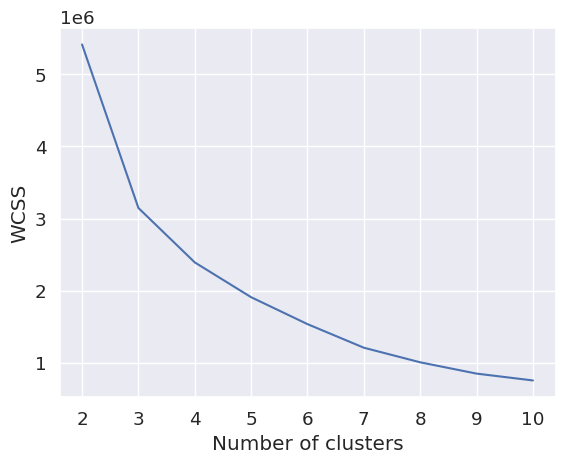

In [38]:
wcss = []

for i in range(2,11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(X_poly)
  wcss.append(kmeans.inertia_)


plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_imputed)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
#As it turns out, the countries are more distributed in different clusters when values are not averaged.
print(data['cluster'].value_counts())
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
data.head()

1    10377
0     4423
2      973
Name: cluster, dtype: int64
[[-0.17119322 -0.3653999   0.06557243 -0.10842216  0.02885294 -1.2545907
  -0.65408792  0.63115048]
 [-0.08988455 -0.07546426 -0.00572053  0.07770879 -0.00773216  0.43021911
   0.2603727  -0.22072904]
 [ 1.73664641  2.46523791 -0.23691912 -0.33628488 -0.04861945  1.11130662
   0.19456773 -0.51322666]]


Indicator Name Country Name  Year  \
0               Afghanistan  1960   
1               Afghanistan  1961   
2               Afghanistan  1962   
3               Afghanistan  1963   
4               Afghanistan  1964   

Indicator Name  Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                                             NaN            
1                                                             NaN            
2                                                             NaN            
3                                                             NaN            
4                                                             NaN            

Indicator Name  GDP (current US$)  GDP growth (annual %)  \
0                    5.377778e+08                    NaN   
1                    5.488889e+08                    NaN   
2                    5.466667e+08                    NaN   
3                    7.511112e+08                    NaN   
4                    8.000000e+08                    NaN   

Indicator Name  GDP per capita (current US$)  \
0                                  62.369375   
1                                  62.443703   
2                                  60.950364   
3                                  82.021738   
4                                  85.511073   

Indicator Name  Inflation, consumer prices (annual %)  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   

Indicator Name  Life expectancy at birth, total (years)  \
0                                                32.535   
1                                                33.068   
2                                                33.547   
3                                                34.016   
4                                                34.494   

Indicator Name  School enrollment, primary (% gross)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

Indicator Name  Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                                             NaN                     
1                                                             NaN                     
2                                                             NaN                     
3                                                             NaN                     
4                                                             NaN                     

Indicator Name  cluster  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

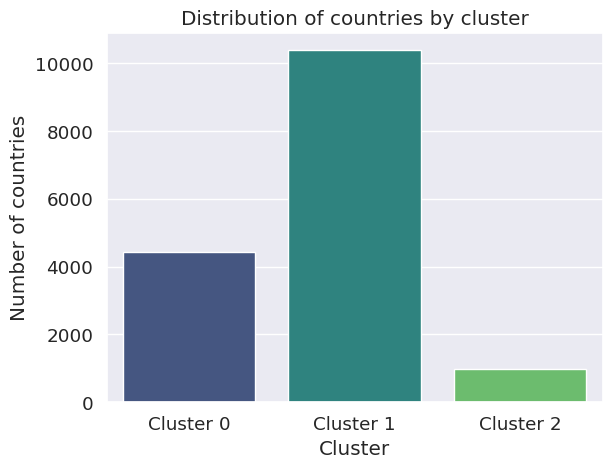

In [41]:
data['cluster_label'] = 'Cluster ' + data['cluster'].astype(str)

sns.countplot(x='cluster_label', data=data, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Number of countries')
plt.title('Distribution of countries by cluster')

plt.show()

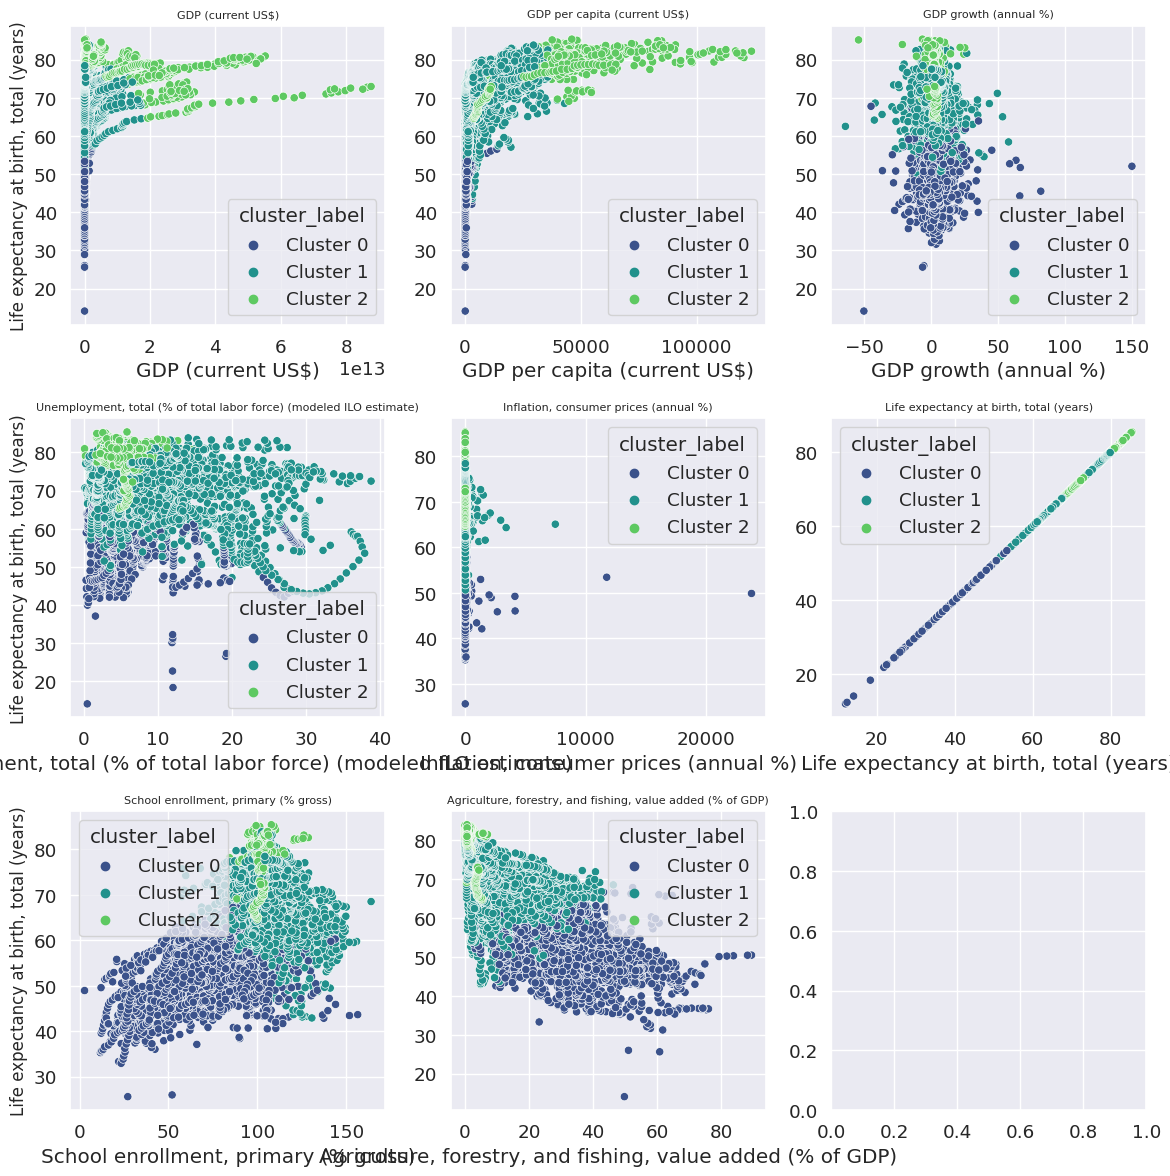

In [42]:
#Since Life expectancy is a good measure of social life, this indicator was used to compare with other indicators. 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, indicator in enumerate(indicators):
    row = i // 3
    col = i % 3

    sns.scatterplot(x=indicator, y='Life expectancy at birth, total (years)',
                    hue='cluster_label', data=data, palette='viridis', ax=axes[row][col])

    if col == 0:
        axes[row][col].set_ylabel('Life expectancy at birth, total (years)', fontsize=12)
    else:
        axes[row][col].set_ylabel(None)

    axes[row][col].set_title(indicator,fontsize=8)
    
plt.tight_layout()

plt.show()

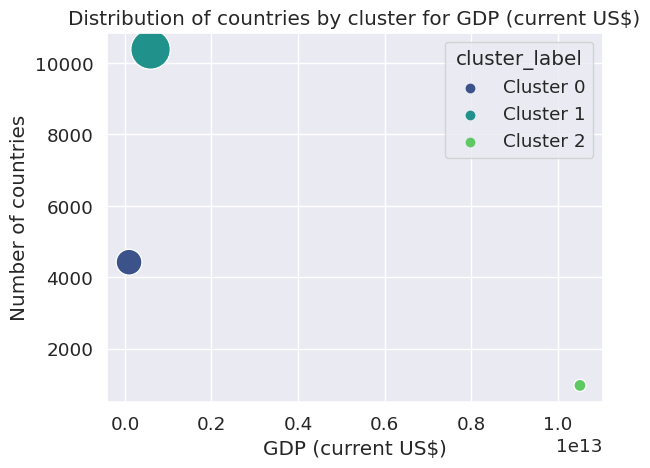

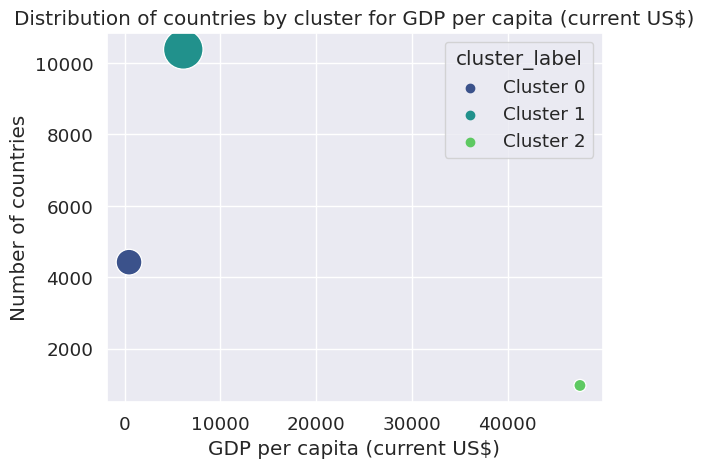

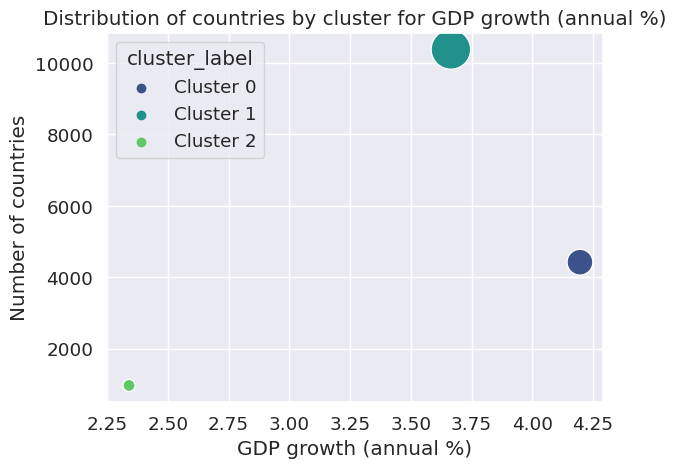

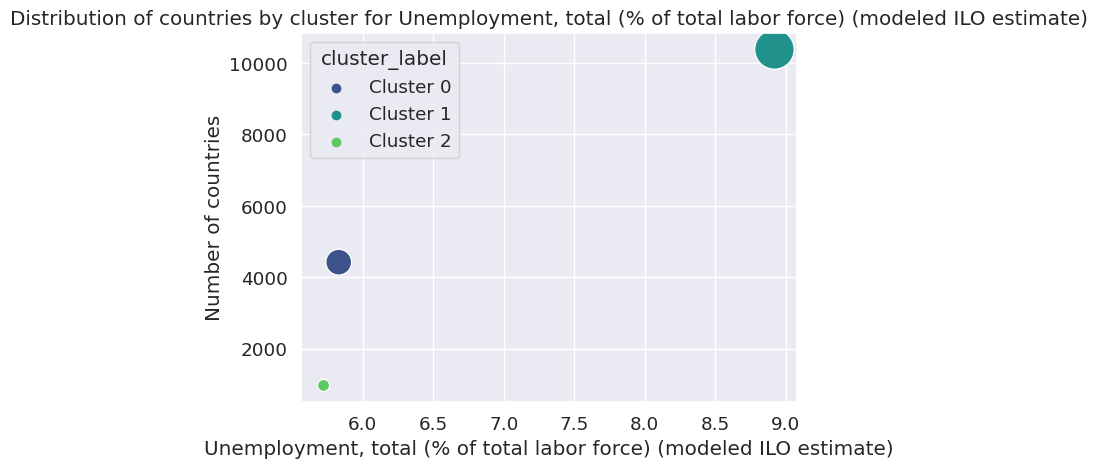

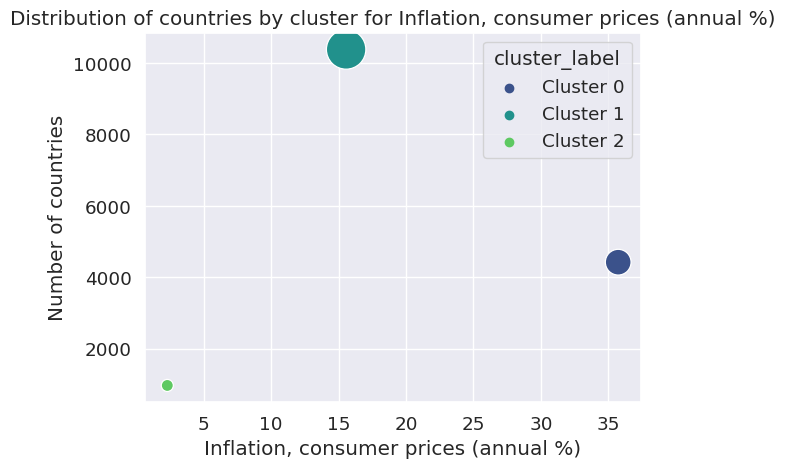

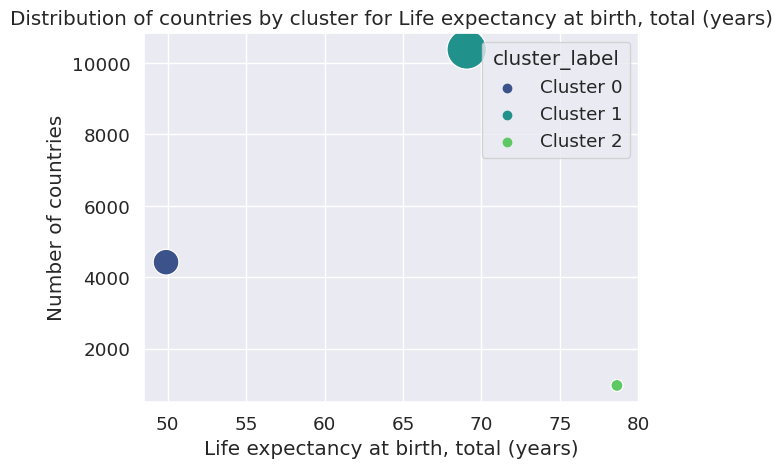

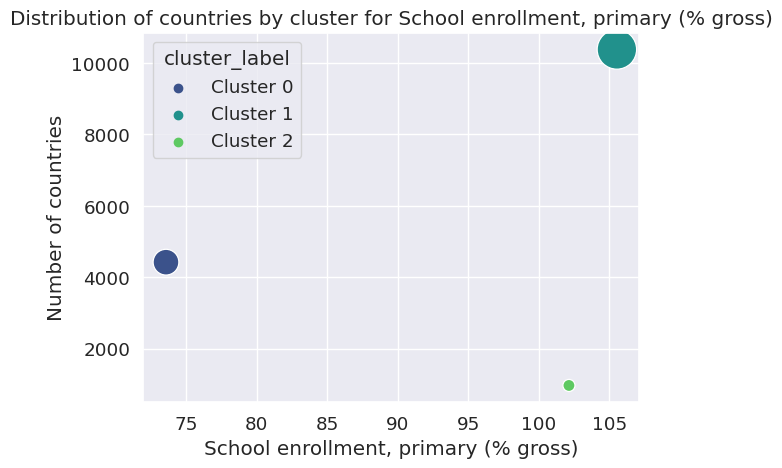

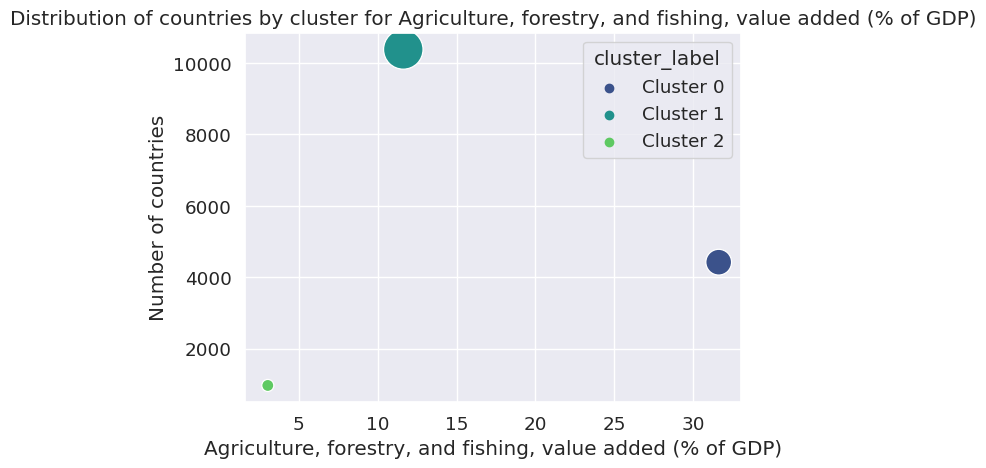

In [43]:
for indicator in indicators:
    cluster_df = data.groupby(['cluster_label'], as_index=False).agg({indicator: 'mean', 'Country Name': 'count'})

    marker_size = 20 * cluster_df['Country Name'] / data['Country Name'].nunique()
    sns.scatterplot(x=indicator, y='Country Name', hue='cluster_label', data=cluster_df, palette='viridis', s=marker_size)

    plt.xlabel(indicator)
    plt.ylabel('Number of countries')
    plt.title(f'Distribution of countries by cluster for {indicator}')

    plt.show()